In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from financial_indicators.calculator import IndicatorCalculator
from financial_indicators.registry import registry
import financial_indicators.indicators

np.random.seed(42)

In [2]:
# 샘플 데이터 생성 (500일)
n = 500
base_price = 100.0

# Random walk + 약간의 트렌드
returns = np.random.randn(n) * 2 + 0.05
close_prices = base_price + np.cumsum(returns)

# OHLC 생성
open_prices = close_prices + np.random.randn(n) * 0.5
high_prices = np.maximum(open_prices, close_prices) + np.abs(np.random.randn(n)) * 1.5
low_prices = np.minimum(open_prices, close_prices) - np.abs(np.random.randn(n)) * 1.5

candle_df = pd.DataFrame({
    'timestamp': pd.date_range('2023-01-01', periods=n, freq='D'),
    'open': open_prices,
    'high': high_prices,
    'low': low_prices,
    'close': close_prices,
    'volume': np.random.rand(n) * 1000000 + 500000
})

print(f"데이터: {len(candle_df)}행")
print(f"가격 범위: {candle_df['close'].min():.2f} ~ {candle_df['close'].max():.2f}")
candle_df.head()

데이터: 500행
가격 범위: 78.20 ~ 152.72


,timestamp,open,high,low,close,volume
0,2023-01-01,101.506517,103.605550,99.875887,101.043428,9.071065e+05
1,2023-01-02,101.771608,103.158559,99.990121,100.816900,5.660098e+05
2,2023-01-03,101.462993,102.251722,100.235695,102.162277,8.488205e+05
3,2023-01-04,105.539821,106.510226,105.253275,105.258336,6.109981e+05
4,2023-01-05,104.514708,105.887365,104.259432,104.840030,1.308235e+06


In [3]:
# Calculator 생성
calc = IndicatorCalculator(registry)

# 등록된 지표 확인
print("등록된 지표:", registry.list_all())

등록된 지표: ['ema', 'rsi', 'rsi_entropy', 'sma']


In [4]:
# SMA 계산
sma_20 = calc.calculate("sma", candle_df, period=20)
sma_50 = calc.calculate("sma", candle_df, period=50)

print(f"SMA-20: min={np.nanmin(sma_20):.2f}, max={np.nanmax(sma_20):.2f}")
print(f"SMA-50: min={np.nanmin(sma_50):.2f}, max={np.nanmax(sma_50):.2f}")
print(f"캐시 크기: {calc.get_cache_size()}")

SMA-20: min=81.54, max=147.02
SMA-50: min=84.20, max=140.53
캐시 크기: 2


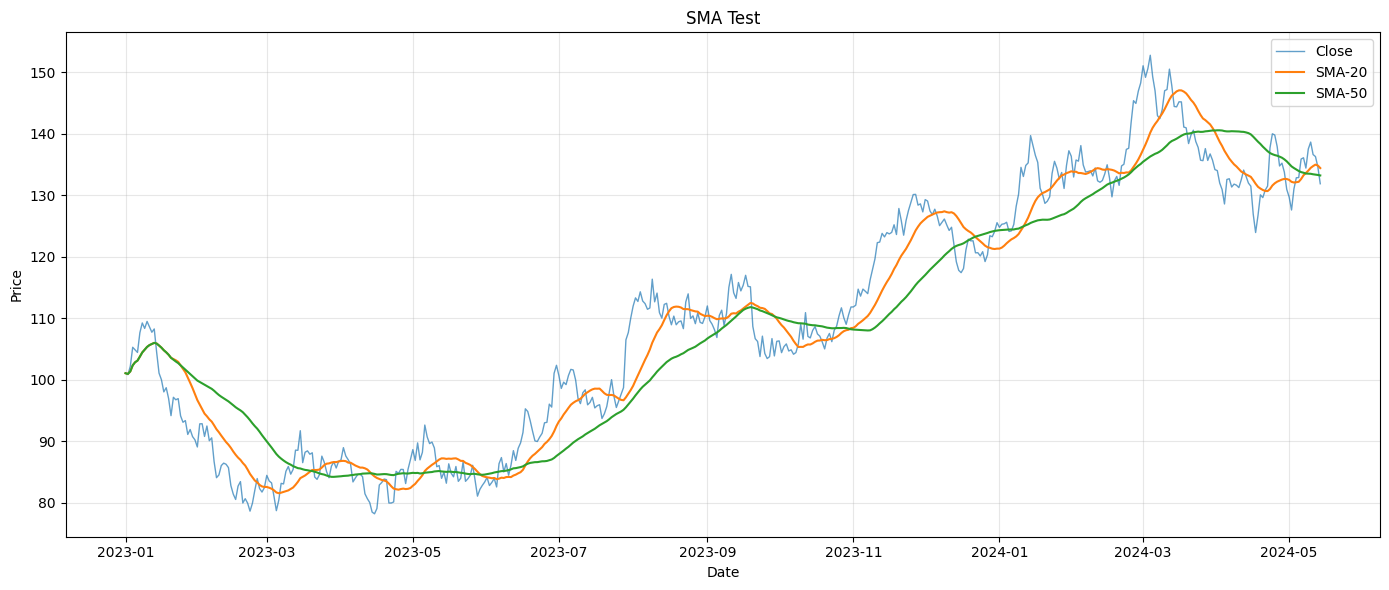

In [5]:
# SMA 시각화
fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(candle_df['timestamp'], candle_df['close'], label='Close', linewidth=1, alpha=0.7)
ax.plot(candle_df['timestamp'], sma_20, label='SMA-20', linewidth=1.5)
ax.plot(candle_df['timestamp'], sma_50, label='SMA-50', linewidth=1.5)

ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('SMA Test')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [6]:
# EMA 계산
ema_12 = calc.calculate("ema", candle_df, period=12)
ema_26 = calc.calculate("ema", candle_df, period=26)

print(f"EMA-12: min={np.nanmin(ema_12):.2f}, max={np.nanmax(ema_12):.2f}")
print(f"EMA-26: min={np.nanmin(ema_26):.2f}, max={np.nanmax(ema_26):.2f}")
print(f"캐시 크기: {calc.get_cache_size()}")

EMA-12: min=81.52, max=146.63
EMA-26: min=82.69, max=144.10
캐시 크기: 4


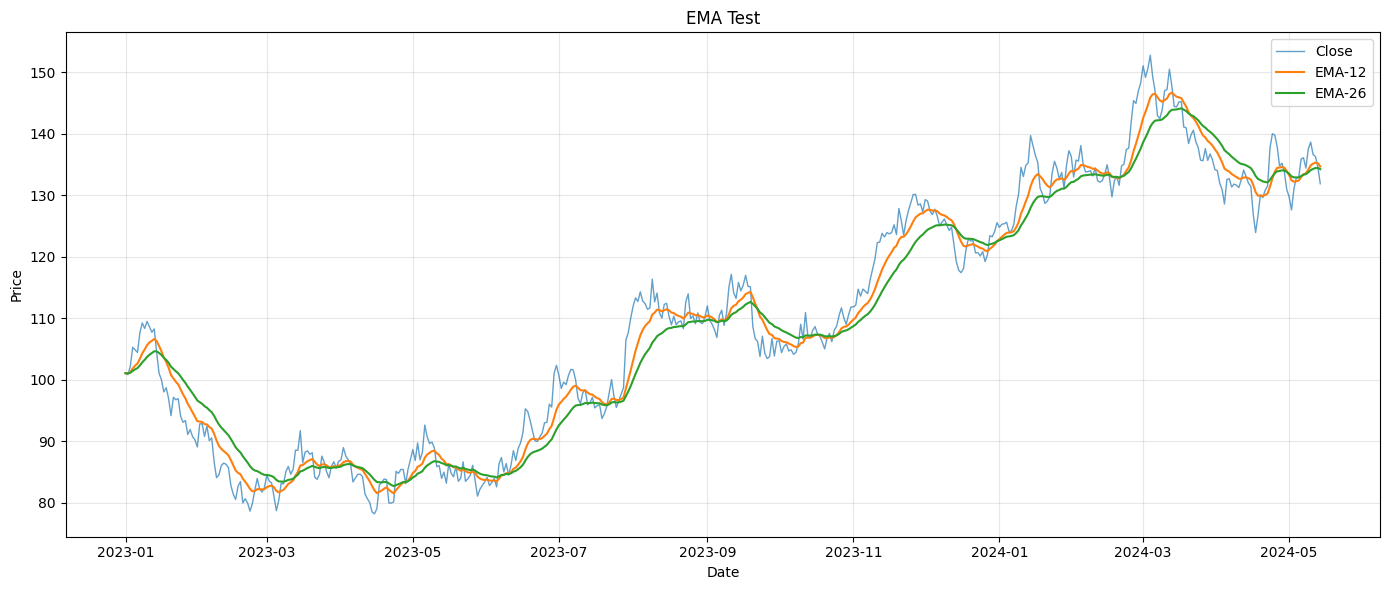

In [7]:
# EMA 시각화
fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(candle_df['timestamp'], candle_df['close'], label='Close', linewidth=1, alpha=0.7)
ax.plot(candle_df['timestamp'], ema_12, label='EMA-12', linewidth=1.5)
ax.plot(candle_df['timestamp'], ema_26, label='EMA-26', linewidth=1.5)

ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('EMA Test')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [8]:
# RSI 계산
rsi_14 = calc.calculate("rsi", candle_df, period=14)

print(f"RSI-14: min={np.nanmin(rsi_14):.2f}, max={np.nanmax(rsi_14):.2f}")
print(f"RSI-14 범위 확인: 0-100 사이? {np.all((rsi_14 >= 0) & (rsi_14 <= 100))}")
print(f"캐시 크기: {calc.get_cache_size()}")

RSI-14: min=0.00, max=95.70
RSI-14 범위 확인: 0-100 사이? True
캐시 크기: 5


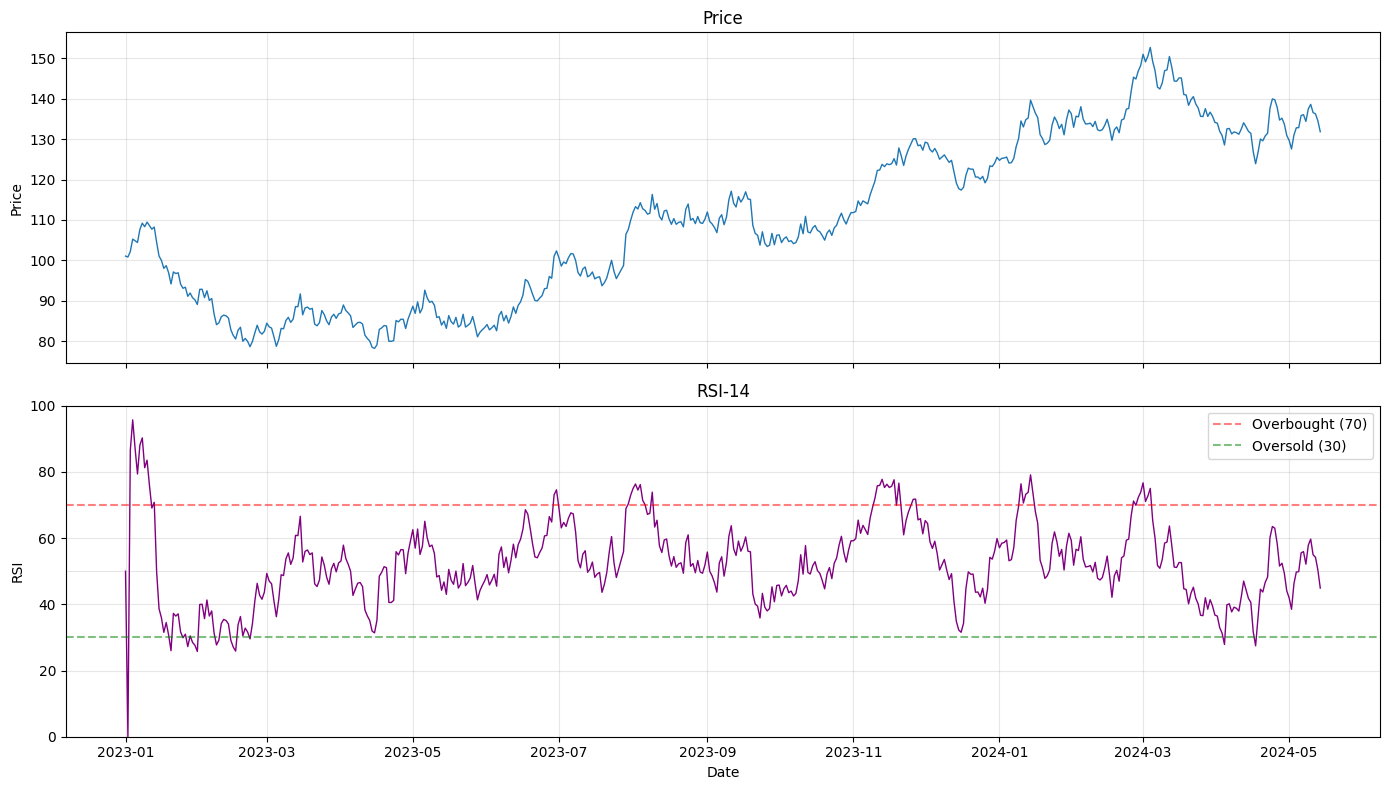

In [9]:
# RSI 시각화
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# Price
ax1.plot(candle_df['timestamp'], candle_df['close'], linewidth=1)
ax1.set_ylabel('Price')
ax1.set_title('Price')
ax1.grid(True, alpha=0.3)

# RSI
ax2.plot(candle_df['timestamp'], rsi_14, linewidth=1, color='purple')
ax2.axhline(y=70, color='r', linestyle='--', alpha=0.5, label='Overbought (70)')
ax2.axhline(y=30, color='g', linestyle='--', alpha=0.5, label='Oversold (30)')
ax2.axhline(y=50, color='gray', linestyle='-', alpha=0.3, linewidth=0.5)
ax2.set_xlabel('Date')
ax2.set_ylabel('RSI')
ax2.set_title('RSI-14')
ax2.set_ylim(0, 100)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [10]:
# RSI Entropy 계산
rsi_entropy = calc.calculate("rsi_entropy", candle_df, rsi_period=20, entropy_window=365)

print("RSI Entropy keys:", list(rsi_entropy.keys()))
print(f"base: min={np.nanmin(rsi_entropy['base']):.3f}, max={np.nanmax(rsi_entropy['base']):.3f}")
print(f"z-1: min={np.nanmin(rsi_entropy['z-1']):.3f}, max={np.nanmax(rsi_entropy['z-1']):.3f}")
print(f"z+1: min={np.nanmin(rsi_entropy['z+1']):.3f}, max={np.nanmax(rsi_entropy['z+1']):.3f}")
print(f"buy: min={np.nanmin(rsi_entropy['buy']):.3f}, max={np.nanmax(rsi_entropy['buy']):.3f}")
print(f"sell: min={np.nanmin(rsi_entropy['sell']):.3f}, max={np.nanmax(rsi_entropy['sell']):.3f}")
print(f"캐시 크기: {calc.get_cache_size()}")

RSI Entropy keys: ['base', 'z-1', 'z+1', 'buy', 'sell']
base: min=0.000, max=0.955
z-1: min=0.408, max=0.473
z+1: min=0.615, max=0.635
buy: min=0.335, max=1.000
sell: min=0.452, max=1.000
캐시 크기: 6


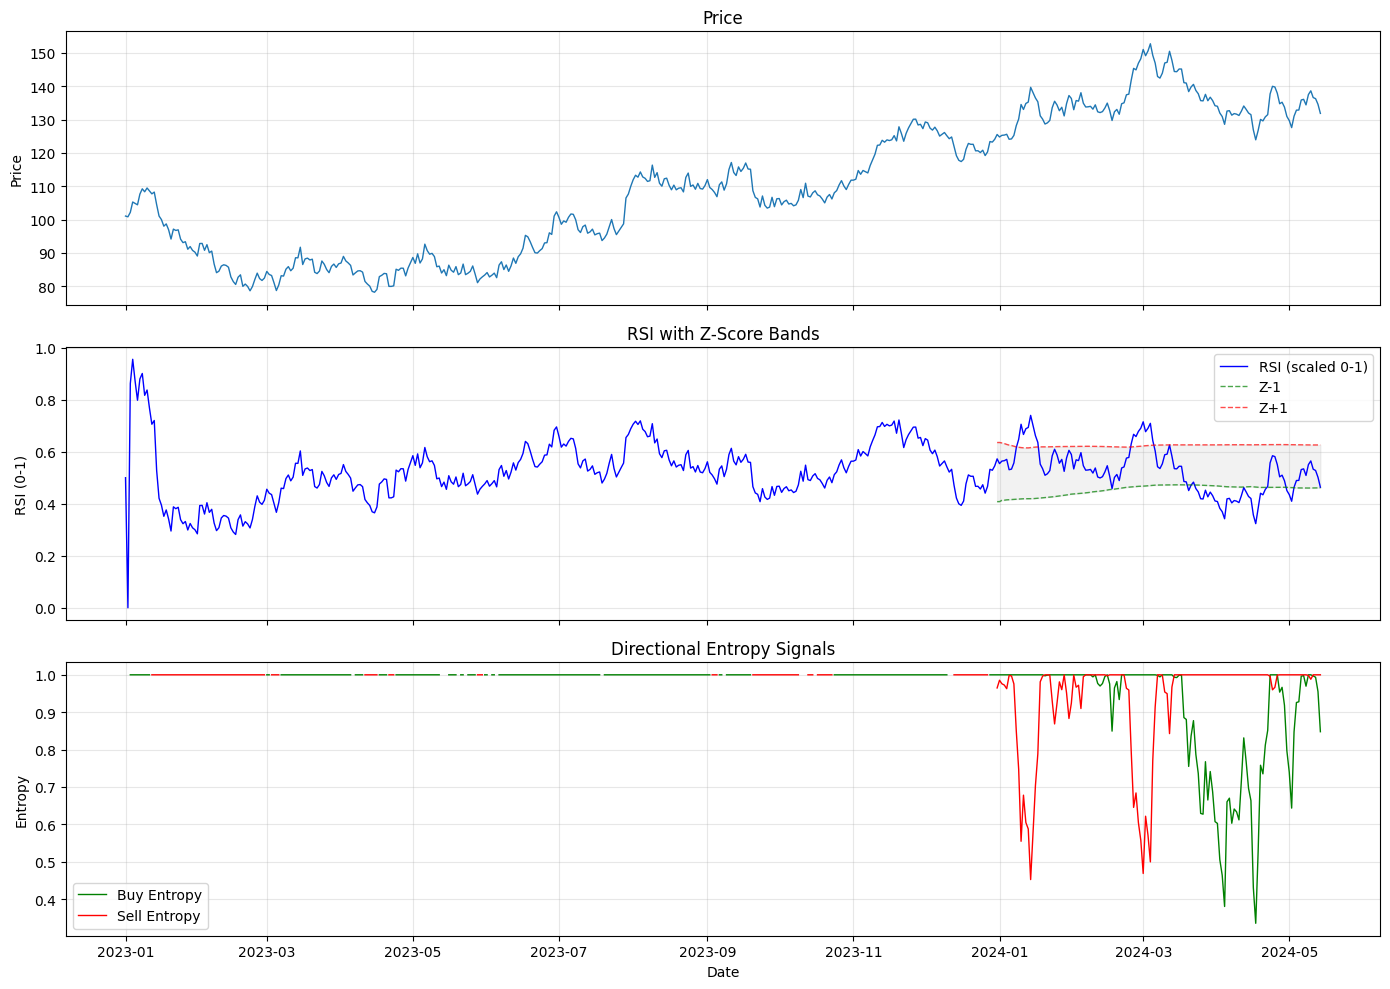

In [11]:
# RSI Entropy 시각화
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 10), sharex=True)

# Price
ax1.plot(candle_df['timestamp'], candle_df['close'], linewidth=1)
ax1.set_ylabel('Price')
ax1.set_title('Price')
ax1.grid(True, alpha=0.3)

# RSI with bands
ax2.plot(candle_df['timestamp'], rsi_entropy['base'], linewidth=1, label='RSI (scaled 0-1)', color='blue')
ax2.plot(candle_df['timestamp'], rsi_entropy['z-1'], linewidth=1, linestyle='--', label='Z-1', color='green', alpha=0.7)
ax2.plot(candle_df['timestamp'], rsi_entropy['z+1'], linewidth=1, linestyle='--', label='Z+1', color='red', alpha=0.7)
ax2.fill_between(candle_df['timestamp'], rsi_entropy['z-1'], rsi_entropy['z+1'], alpha=0.1, color='gray')
ax2.set_ylabel('RSI (0-1)')
ax2.set_title('RSI with Z-Score Bands')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Entropy signals
ax3.plot(candle_df['timestamp'], rsi_entropy['buy'], linewidth=1, label='Buy Entropy', color='green')
ax3.plot(candle_df['timestamp'], rsi_entropy['sell'], linewidth=1, label='Sell Entropy', color='red')
ax3.set_xlabel('Date')
ax3.set_ylabel('Entropy')
ax3.set_title('Directional Entropy Signals')
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [12]:
# Batch 계산 테스트
calc.clear_cache()

batch_results = calc.calculate_batch([
    {"name": "sma", "period": 20},
    {"name": "sma", "period": 50},
    {"name": "ema", "period": 12},
    {"name": "ema", "period": 26},
    {"name": "rsi", "period": 14}
], candle_df)

print("Batch 결과 keys:", list(batch_results.keys()))
print(f"캐시 크기: {calc.get_cache_size()}")

Batch 결과 keys: ['sma_20', 'sma_50', 'ema_12', 'ema_26', 'rsi_14']
캐시 크기: 5


In [13]:
# 통계 요약
print("=" * 60)
print("통계 요약")
print("=" * 60)
print(f"\nClose Price:")
print(f"  Mean: {candle_df['close'].mean():.2f}")
print(f"  Std: {candle_df['close'].std():.2f}")
print(f"  Min: {candle_df['close'].min():.2f}")
print(f"  Max: {candle_df['close'].max():.2f}")

print(f"\nSMA-20:")
print(f"  Mean: {np.nanmean(sma_20):.2f}")
print(f"  Std: {np.nanstd(sma_20):.2f}")

print(f"\nEMA-12:")
print(f"  Mean: {np.nanmean(ema_12):.2f}")
print(f"  Std: {np.nanstd(ema_12):.2f}")

print(f"\nRSI-14:")
print(f"  Mean: {np.nanmean(rsi_14):.2f}")
print(f"  Std: {np.nanstd(rsi_14):.2f}")
print(f"  Over 70: {np.sum(rsi_14 > 70)}")
print(f"  Under 30: {np.sum(rsi_14 < 30)}")

print(f"\nRSI Entropy:")
print(f"  Base mean: {np.nanmean(rsi_entropy['base']):.3f}")
print(f"  Buy entropy mean: {np.nanmean(rsi_entropy['buy']):.3f}")
print(f"  Sell entropy mean: {np.nanmean(rsi_entropy['sell']):.3f}")

통계 요약

Close Price:
  Mean: 109.78
  Std: 20.21
  Min: 78.20
  Max: 152.72

SMA-20:
  Mean: 109.19
  Std: 19.62

EMA-12:
  Mean: 109.41
  Std: 19.78

RSI-14:
  Mean: 52.31
  Std: 12.36
  Over 70: 46
  Under 30: 15

RSI Entropy:
  Base mean: 0.523
  Buy entropy mean: 0.964
  Sell entropy mean: 0.966
